In [1]:
import torch
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv, BatchNorm
from collections import defaultdict
import json
import networkx as nx
from torch import nn
import math
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split

In [2]:
class NodeClassificationGNN(nn.Module):
    def __init__(self, input_dim, hidden_channel, num_classes, dropout=0.3, activation=nn.LeakyReLU):
        super().__init__()
        self.activation = activation()  # Initialize activation function
        self.conv1 = SAGEConv(input_dim, hidden_channel)
        self.bn1 = BatchNorm(hidden_channel)  # BatchNorm for first layer
        self.conv2 = SAGEConv(hidden_channel, hidden_channel)
        self.bn2 = BatchNorm(hidden_channel)  # BatchNorm for second layer
        self.dropout = nn.Dropout(dropout)
        
        # MLP for final classification
        self.mlp = nn.Sequential(
            nn.Linear(hidden_channel, hidden_channel),
            self.activation,
            nn.Dropout(dropout),
            nn.Linear(hidden_channel, num_classes)
        )

    def forward(self, x, edge_index):
        # First convolutional layer with batch normalization and activation
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = self.activation(x)
        x = self.dropout(x)
        
        # Second convolutional layer with batch normalization and activation
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = self.activation(x)
        x = self.dropout(x)
        
        # Pass through the MLP for final predictions
        x = self.mlp(x)
        return x


In [6]:
!pip3.10 install torchviz

  Using cached torchviz-0.0.3-py3-none-any.whl.metadata (2.1 kB)
Using cached torchviz-0.0.3-py3-none-any.whl (5.7 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip


In [10]:
model = NodeClassificationGNN(input_dim=128, hidden_channel=256, num_classes=13)

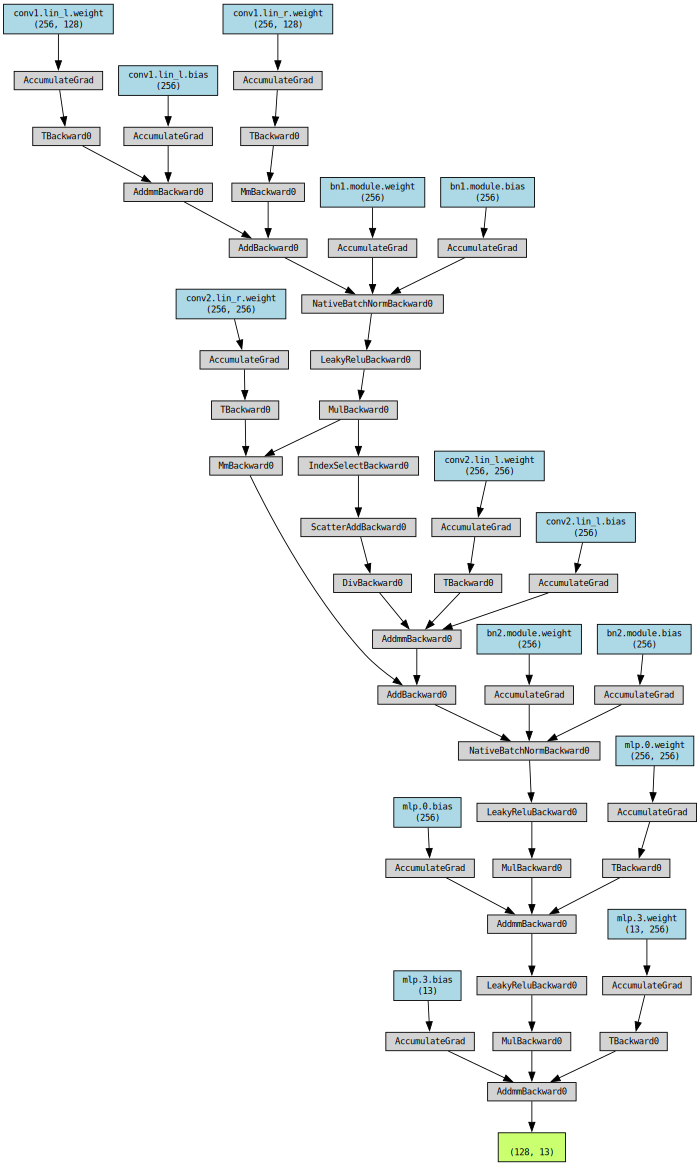

In [12]:
from torchviz import make_dot

x = torch.randn(128, 128)
edge_index = torch.randint(0, 128, (2, 100))
make_dot(model(x, edge_index), params=dict(model.named_parameters()))

In [13]:
# save it
make_dot(model(x, edge_index), params=dict(model.named_parameters())).render("model", format="png")

'model.png'